In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

In [13]:
! ls /home/thusitha/projects/code/jetson-inference/data/images/cat_1.jpg

airplane_0.jpg	drone_0428.png	    horse_1.jpg    peds_3.jpg
airplane_1.jpg	drone_0435.png	    horse_2.jpg    peds_4.jpg
banana_0.jpg	drone_0436.png	    humans_0.jpg   polar_bear.jpg
bird_0.jpg	fruit_0.jpg	    humans_1.jpg   red_apple_0.jpg
bird_1.jpg	fruit_1.jpg	    humans_2.jpg   room_0.jpg
bird_2.jpg	fruit_10.jpg	    humans_3.jpg   room_1.jpg
black_bear.jpg	fruit_11.jpg	    humans_4.jpg   room_2.jpg
bottle_0.jpg	fruit_12.jpg	    humans_5.jpg   room_3.jpg
brown_bear.jpg	fruit_13.jpg	    humans_6.jpg   room_4.jpg
cat_0.jpg	fruit_14.jpg	    humans_7.jpg   room_5.jpg
cat_1.jpg	fruit_15.jpg	    humans_8.jpg   room_6.jpg
cat_2.jpg	fruit_16.jpg	    humans_9.jpg   room_7.jpg
cat_3.jpg	fruit_17.jpg	    jellyfish.jpg  room_8.jpg
city_0.jpg	fruit_18.jpg	    object_0.jpg   stingray.jpg
city_1.jpg	fruit_19.jpg	    object_1.jpg   strawberry_0.jpg
city_2.jpg	fruit_2.jpg	    object_2.jpg   strawberry_1.jpg
city_3.jpg	fruit_20.jpg	    object_3.jpg   test
city_4.jpg	fruit_3.jpg	    object_4.jpg   trai

In [5]:
!pip install tensorflow-hub

     |################################| 107 kB 12.1 MB/s eta 0:00:01


In [2]:
IMAGE_SHAPE = (224, 224)

class PretrainedMobileNetV2:
    def __init__(self, input_shape=IMAGE_SHAPE):
        classifier_model ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
        self.input_shape = IMAGE_SHAPE
        classifier = tf.keras.Sequential([
            hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
        ])
        self.model = classifier
        labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
        imagenet_labels = np.array(open(labels_path).read().splitlines())
        self.labels = imagenet_labels
    
    def predict(self, image, top=3):
        """ Expecets a (x, y, 3) vector"""
        img_data = np.array(image)/255.0
        result = self.model.predict(img_data[np.newaxis, ...])
        predicted_class_name = self.labels[np.argsort(-result[0], axis=-1)[0:top]]
        return predicted_class_name


In [3]:
classifier = PretrainedMobileNetV2()

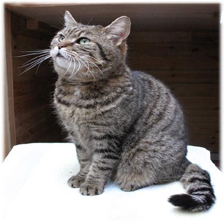

In [4]:
IMAGE_SHAPE = (224, 224)
IMAGE = "/home/thusitha/projects/code/jetson-inference/data/images/cat_1.jpg"
img = Image.open(IMAGE).resize(IMAGE_SHAPE)
img

In [5]:
classifier.predict(img)

array(['tabby', 'Egyptian cat', 'tiger cat'], dtype='<U30')

In [13]:
img_data = np.array(img)/255.0
result = classifier.model.predict(img_data[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = classifier.labels[predicted_class]

array(['water bottle', 'water jug', 'mouse'], dtype='<U30')